Load the `tidyverse` and the 🐧`palmerpenguins`🐧 packages.

In [1]:
library('tidyverse')
library('palmerpenguins')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


We want to make a jitter chart of normalized penguin length measurements (e.g. `bill_depth_mm`). 

Like this:

![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_00_pivot_chart.png?raw=true)

...but our data is not in the right "shape."

Use `pivot_longer` to re-shape the data to create the chart above 👆. 

Then, calculate a normalized value for each measurement by dividing *individual measurement values* by the *maximum value* within the measurement type (e.g. `bill_depth_mm` is a "measurement type") and capture this new value in a new column with `mutate`.

In [4]:
options(repr.plot.width = 8)

penguins2 = penguins |> 
    pivot_longer(c(bill_length_mm, bill_depth_mm, flipper_length_mm)) |>
    group_by(name) |>
    mutate(value_normalized = value / max(value, na.rm = TRUE))

penguins2 |> head()
    

species,island,body_mass_g,sex,year,name,value,value_normalized
<fct>,<fct>,<int>,<fct>,<int>,<chr>,<dbl>,<dbl>
Adelie,Torgersen,3750,male,2007,bill_length_mm,39.1,0.6560403
Adelie,Torgersen,3750,male,2007,bill_depth_mm,18.7,0.8697674
Adelie,Torgersen,3750,male,2007,flipper_length_mm,181.0,0.7835498
Adelie,Torgersen,3800,female,2007,bill_length_mm,39.5,0.6627517
Adelie,Torgersen,3800,female,2007,bill_depth_mm,17.4,0.8093023
Adelie,Torgersen,3800,female,2007,flipper_length_mm,186.0,0.8051948


Now make the chart.

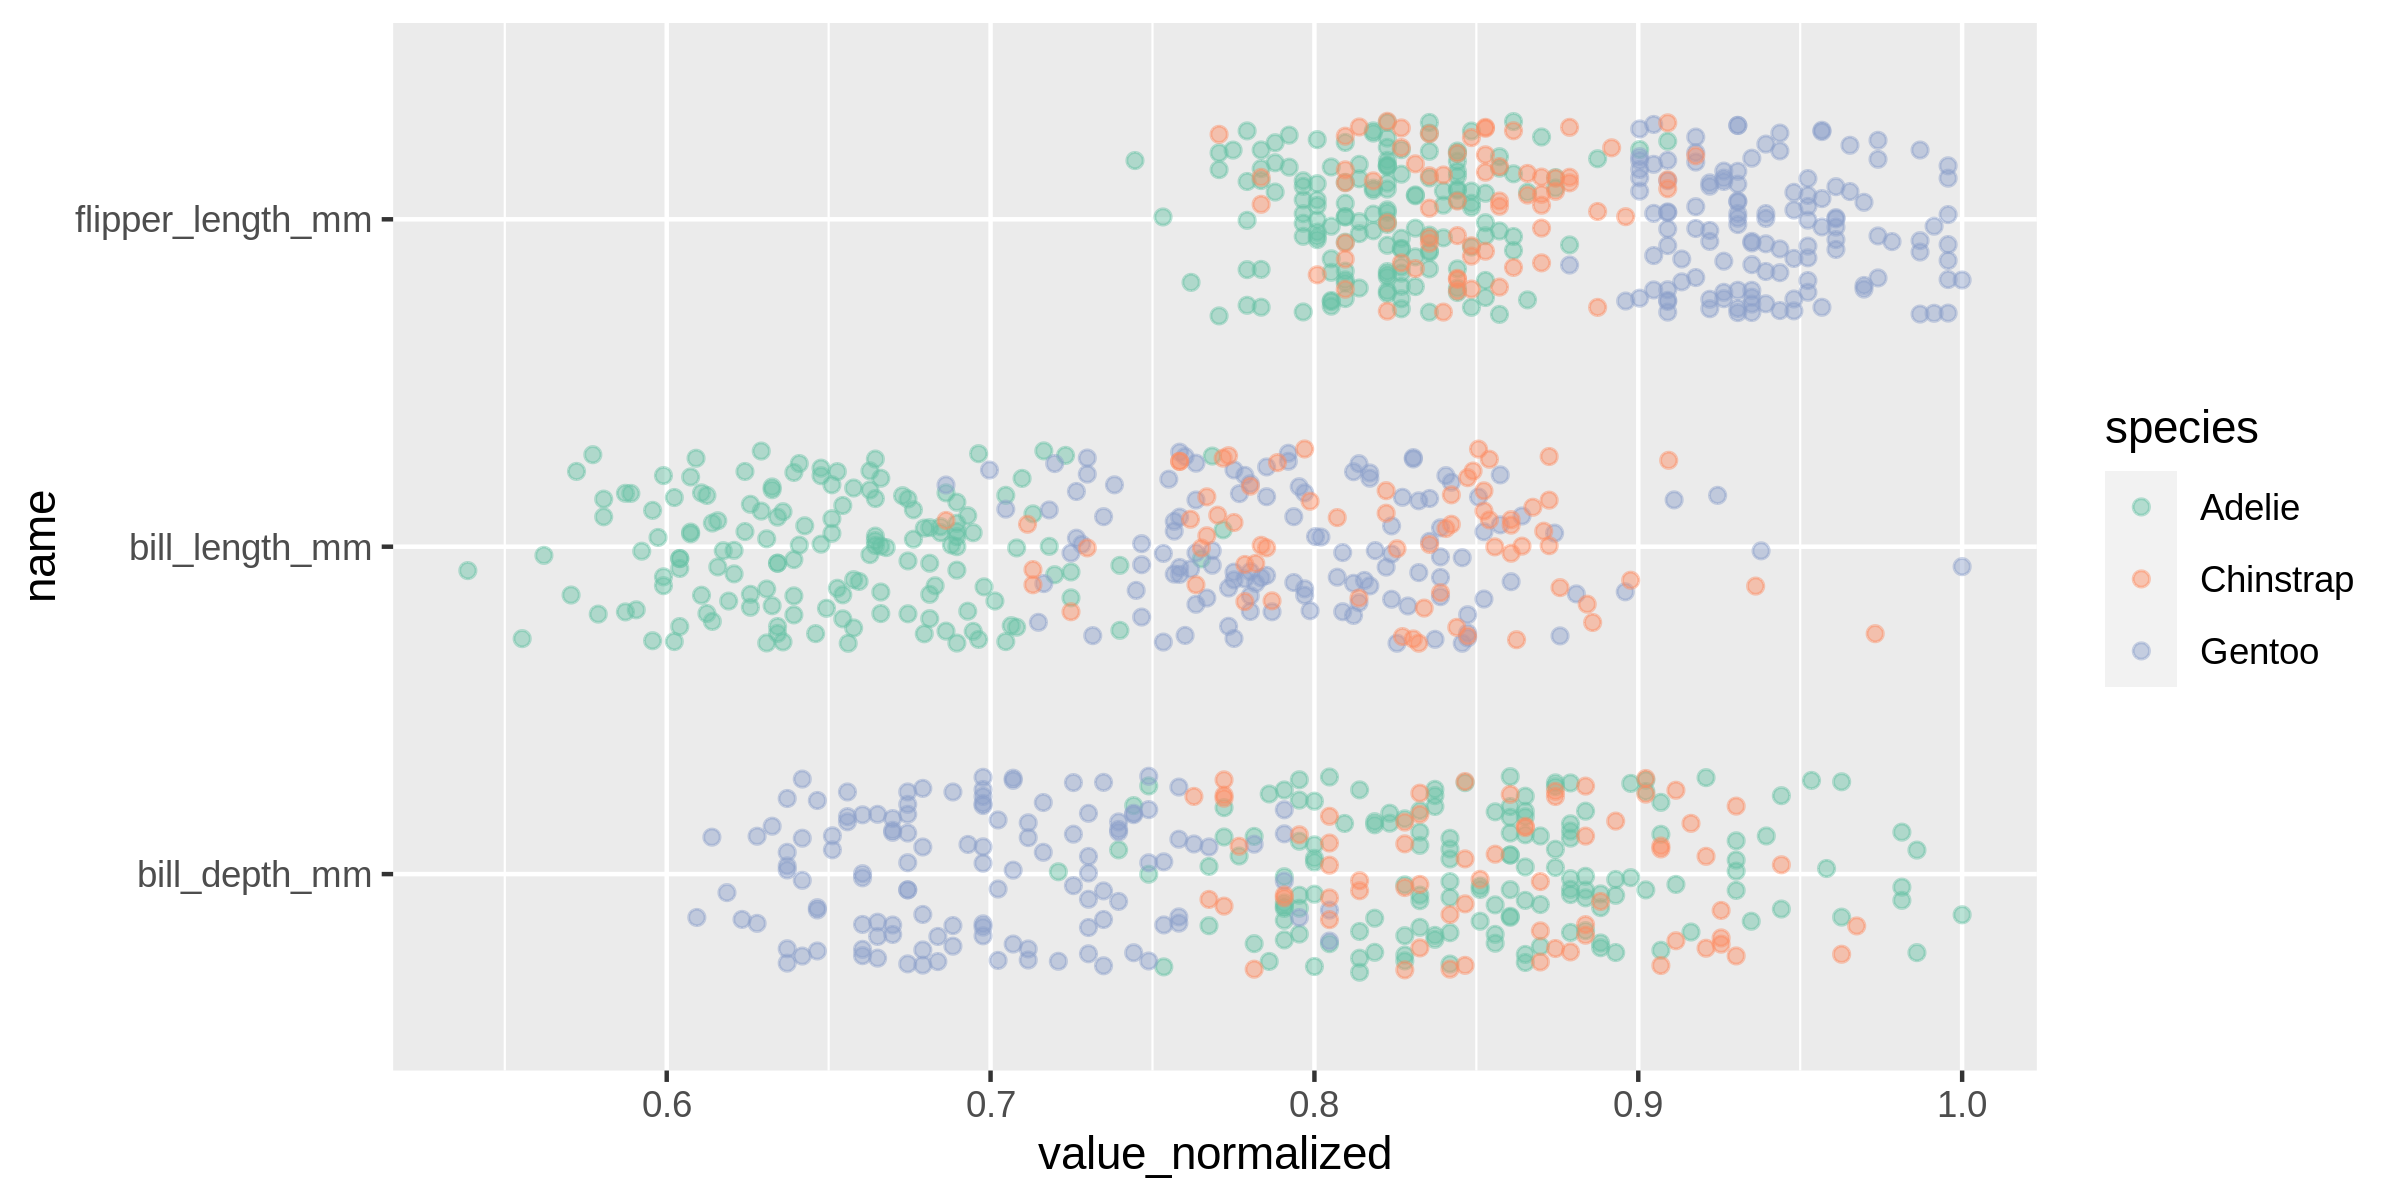

In [3]:
p = ggplot(penguins2, aes(x = value_normalized, y = name, color = species)) + 
    geom_point(position = position_jitter(height = 0.3, width = 0), alpha = 0.45, na.rm = T) +
    scale_color_brewer(palette = 'Set2')

p   